In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import yfinance as yf

In [2]:
start = '2012-01-01'
end = '2022-12-21'

stock = 'GOOG'

data = yf.download(stock,start,end)

C:\Users\RIDHAM INANI\AppData\Local\Temp\ipykernel_50352\2971154148.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.475199,16.543040,16.152335,16.166449,147611217
1,2012-01-04,16.546255,16.595032,16.356598,16.465787,114989399
2,2012-01-05,16.316738,16.439545,16.247907,16.393988,131808205
3,2012-01-06,16.094152,16.341251,16.088457,16.320205,108119746
4,2012-01-09,15.411778,16.019377,15.381324,16.006995,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.746811,96.645528,93.384911,94.975455,26452900
2757,2022-12-15,90.661095,93.474374,89.895648,92.987272,28298800
2758,2022-12-16,90.323105,91.207845,89.478129,90.661092,48485500


In [5]:
df = data.copy()

In [6]:
df

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.475199,16.543040,16.152335,16.166449,147611217
1,2012-01-04,16.546255,16.595032,16.356598,16.465787,114989399
2,2012-01-05,16.316738,16.439545,16.247907,16.393988,131808205
3,2012-01-06,16.094152,16.341251,16.088457,16.320205,108119746
4,2012-01-09,15.411778,16.019377,15.381324,16.006995,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.746811,96.645528,93.384911,94.975455,26452900
2757,2022-12-15,90.661095,93.474374,89.895648,92.987272,28298800
2758,2022-12-16,90.323105,91.207845,89.478129,90.661092,48485500


In [7]:
df.columns

MultiIndex([(  'Date',     ''),
            ( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

In [8]:
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df

,Date,Close,High,Low,Open,Volume
0,2012-01-03,16.475199,16.543040,16.152335,16.166449,147611217
1,2012-01-04,16.546255,16.595032,16.356598,16.465787,114989399
2,2012-01-05,16.316738,16.439545,16.247907,16.393988,131808205
3,2012-01-06,16.094152,16.341251,16.088457,16.320205,108119746
4,2012-01-09,15.411778,16.019377,15.381324,16.006995,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.746811,96.645528,93.384911,94.975455,26452900
2757,2022-12-15,90.661095,93.474374,89.895648,92.987272,28298800
2758,2022-12-16,90.323105,91.207845,89.478129,90.661092,48485500
2759,2022-12-19,88.623215,90.661097,88.399546,90.342988,23020500


In [9]:
ma_100_days = df.Close.rolling(100).mean()

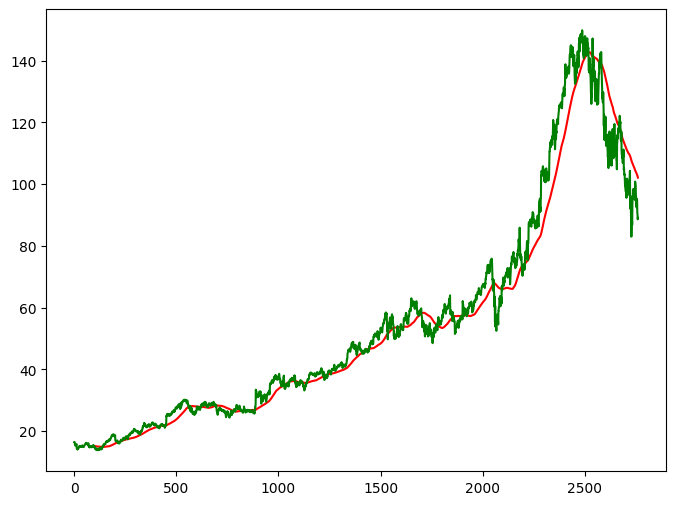

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [11]:
ma_200_days = df.Close.rolling(200).mean()

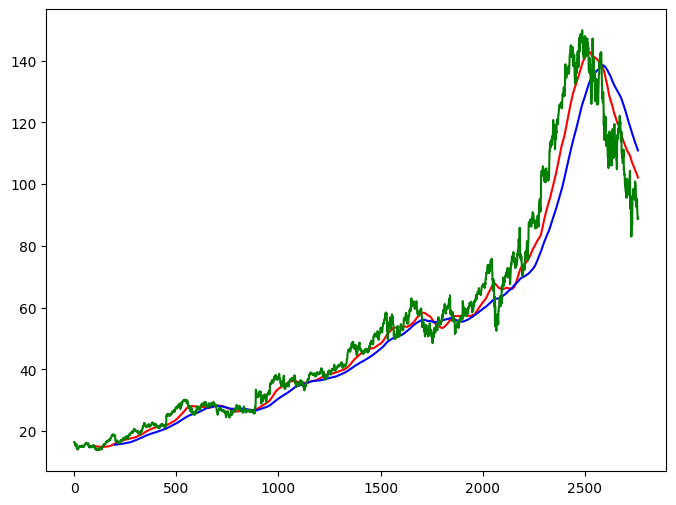

In [12]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(df.Close,'g')
plt.show()

In [13]:
df.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [14]:
df.dropna(inplace= True)

In [15]:
data_train = pd.DataFrame(df.Close[0:int(len(df)*0.80)])
data_test = pd.DataFrame(df.Close[int(len(df)*0.80): len(df)])

In [16]:
data_train.shape

(2208, 1)

In [17]:
data_test.shape

(553, 1)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [19]:
data_train_scale = scaler.fit_transform(data_train)

In [33]:
x = []
y=[]
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [34]:
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential

In [35]:
x , y = np.array(x), np.array(y)

In [37]:
model = Sequential()
model.add(LSTM(units = 50,activation = 'relu',return_sequences = True, input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80,activation='relu',return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [39]:
model.compile(optimizer = 'adam',loss= 'mean_squared_error')

In [41]:
model.fit(x,y,epochs = 50 , batch_size = 32, verbose = 1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 197ms/step - loss: 0.0620
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 0.0071
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.0058
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.0053
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 0.0052
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 0.0050
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.0043
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0045
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0043
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.0041
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 0.0034
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0036
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.0035
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 0.0029
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.0034
Ep

In [42]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [43]:
past_100_days = data_train.tail(100)

In [44]:
data_test = pd.concat([past_100_days,data_test],ignore_index = True)

In [49]:
data_test_scale = scaler.fit_transform(data_test)

In [52]:
x = []
y=[]
for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
    

In [53]:
x , y = np.array(x), np.array(y)
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


In [57]:
scale = 1/scaler.scale_

In [58]:
y_predict = y_predict*scale

In [59]:
y = y*scale

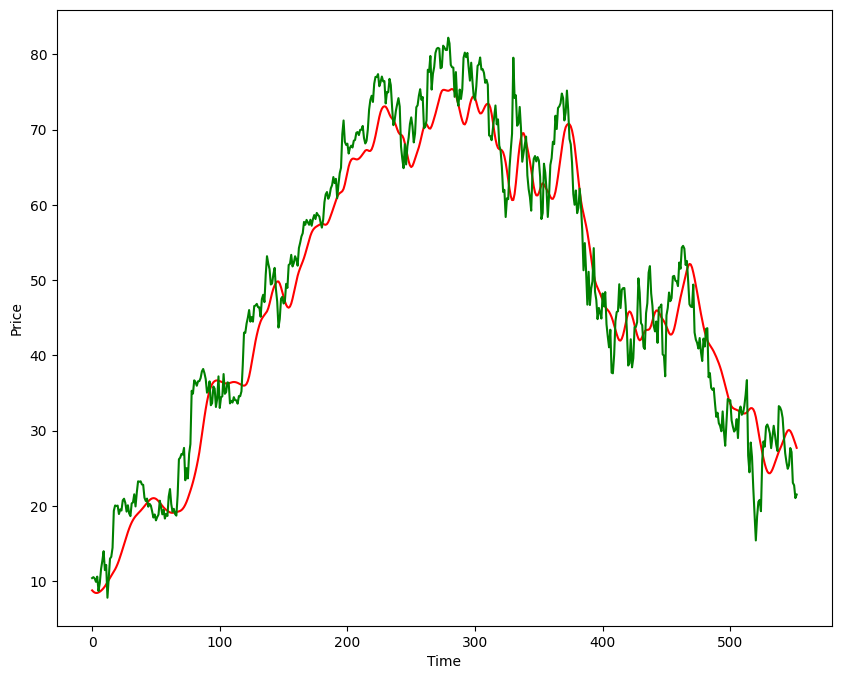

In [60]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label = 'Predicted_price')
plt.plot(y,'g',label ='Original_price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [61]:
model.save('Stock Prediction model.keras')